# Phase 3







### SQL Operations







#### Note: Create a separate table for each file and give a meaningful name.







When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.







3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table







3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year







3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year







3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table







3.5	Write SQL query to find the highest number of dacoity/robbery in which district.







3.6	Write SQL query to find in which districts(All) the lowest number of murders happened







3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.







3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table







3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.







3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.







3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)









## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [1]:
import pandas as pd
import sqlite3

In [8]:
women_crime = pd.read_csv("42District_wise_crimes_committed_against_women_2001_2012.csv")
women_crime.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [2]:
# connection object
db = sqlite3.connect('women_crime_database.db')

In [3]:
# declaring cursor
cur = db.cursor()

In [11]:
# creating table 
cur.execute("create table womens_crime(STATE_UT TEXT ,DISTRICT text,Year int,Rape int,Kidnapping_and_Abduction int,Dowry_Deaths int,Assault_on_women_with_ntent_to_outrage_her_modesty int,Insult_to_modesty_of_Women int,Cruelty_by_Husband_or_his_Relatives int,Importation_of_Girls int)")

In [14]:
# inserting the values into the table
with open("42District_wise_crimes_committed_against_women_2001_2012.csv",'r') as file:
    total_records = 0
    for row in file:
        cur.execute(" insert into womens_crime values(?,?,?,?,?,?,?,?,?,?) ",row.split(','))
        db.commit()
        total_records+=1
print(total_records,"records inserted")

8610 records inserted


In [15]:
# displaying the records
res = cur.execute('select * from womens_crime')
for i in res:
    print(i)

('STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls\n')
('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 200

## 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [22]:
# deleting the old headers and total records
cur.execute("delete from womens_crime where STATE_UT = 'STATE/UT' or DISTRICT = 'DELHI UT TOTAL' ")
db.commit()

In [31]:
# maximum count of rapes happened 
max_rape = cur.execute('select max(Rape) from womens_crime')
max_rape.fetchall()

[(568,)]

In [32]:
# maximum count of kidnapping
max_kidnap = cur.execute('select max(Kidnapping_and_Abduction) from womens_crime')
max_kidnap.fetchall()

[(492,)]

In [44]:
#find the highest number of rapes & Kidnappings that happened in which state, District, and year
max_val = cur.execute("select STATE_UT,DISTRICT,Year from womens_crime where Rape = 568 or Kidnapping_and_Abduction = 492")
max_val.fetchall()

[('WEST BENGAL', 'MURSHIDABAD', 2009), ('WEST BENGAL', 'MURSHIDABAD', 2011)]

### Observation :
* WEST BENGAL's MURSHIDABAD is the place where maximum rape and kidnapping happened in 2009 and 2011

## 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [36]:
# minimum rape count
min_rape = cur.execute('select min(Rape) from womens_crime')
min_rape.fetchall()

[(0,)]

In [38]:
# minimum kidnapping count
min_kidnap = cur.execute('select min(Rape) from womens_crime')
min_kidnap.fetchall()

[(0,)]

In [41]:
# All the lowest number of rapes & Kidnappings that happened in which state, District, and year
min_val = cur.execute("select STATE_UT,DISTRICT,Year from womens_crime where Rape = 0 & Kidnapping_and_Abduction = 0")
min_val.fetchall()

[('ANDHRA PRADESH', 'ADILABAD', 2001),
 ('ANDHRA PRADESH', 'ANANTAPUR', 2001),
 ('ANDHRA PRADESH', 'CHITTOOR', 2001),
 ('ANDHRA PRADESH', 'CUDDAPAH', 2001),
 ('ANDHRA PRADESH', 'EAST GODAVARI', 2001),
 ('ANDHRA PRADESH', 'GUNTUR', 2001),
 ('ANDHRA PRADESH', 'HYDERABAD CITY', 2001),
 ('ANDHRA PRADESH', 'KARIMNAGAR', 2001),
 ('ANDHRA PRADESH', 'KHAMMAM', 2001),
 ('ANDHRA PRADESH', 'KRISHNA', 2001),
 ('ANDHRA PRADESH', 'KURNOOL', 2001),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001),
 ('ANDHRA PRADESH', 'MEDAK', 2001),
 ('ANDHRA PRADESH', 'NALGONDA', 2001),
 ('ANDHRA PRADESH', 'NELLORE', 2001),
 ('ANDHRA PRADESH', 'NIZAMABAD', 2001),
 ('ANDHRA PRADESH', 'PRAKASHAM', 2001),
 ('ANDHRA PRADESH', 'RANGA REDDY', 2001),
 ('ANDHRA PRADESH', 'SRIKAKULAM', 2001),
 ('ANDHRA PRADESH', 'VIJAYAWADA', 2001),
 ('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001),
 ('ANDHRA PRADESH', 'VISAKHA RURAL', 2001),
 ('ANDHRA PRADESH', 'VISAKHAPATNAM', 2001),
 ('ANDHRA PRADESH', 'VIZIANAGARAM', 2001),
 ('ANDHRA PRADESH', 'WAR

## 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [45]:
import pandas as pd 
import sqlite3

In [35]:
# importing the dataset  
st_data = pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
st_data.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [36]:
st_data.shape

(8597, 13)

In [30]:
db = sqlite3.connect('women_crime_database.db')

In [38]:
cur = db.cursor()

In [39]:
# Creating the table crimest
cur.execute("create table crimest(STATE_UT text,DISTRICT text,Year int,Murde int,Rape int,Kidnapping_Abduction int,Dacoity int,Robbery int,Arson int,Hurt int,Protection_of_Civil_Rights_PCR_Act int,Prevention_of_atrocities_POA_Act int,Other_Crimes_Against_STs int)")

In [40]:
# inserting the records into the crimest table
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file:
    total_records = 0
    for row in file:
        cur.execute("insert into crimest values(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(','))
        db.commit()
        total_records+=1
print(total_records,"records inserted")

8598 records inserted


In [41]:
# Display records 
res = cur.execute('select * from crimest')
for i in res:
    print(i)

('STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape', 'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Protection of Civil Rights (PCR) Act', 'Prevention of atrocities (POA) Act', 'Other Crimes Against STs\n')
('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH',

## 3.5 Write SQL query to find the highest number of dacoity/robbery in which district

In [42]:
# Deleting the headers
cur.execute("delete from crimest where STATE_UT = 'STATE/UT'")
db.commit()

In [46]:
# DISTRICT that has highest number of dacoity
max_dacoity = cur.execute('select max(Dacoity) from crimest')

In [47]:
max_dacoity.fetchall

[(29,)]

In [53]:
max_robbery = cur.execute('select max(Robbery) from crimest')

In [54]:
# maximum robbery count 
max_robbery.fetchall()

[(32,)]

In [65]:
#  District which has highest number of dacoity and robbery
row = cur.execute("select DISTRICT from crimest where Dacoity == 29  or Robbery = 32")
row.fetchall()

[('GUJARAT', 'DAHOD'), ('GUJARAT', 'DAHOD')]

### Result:
* The Gujarat's DAHOD district has the highest number of dacoity and robbery.

## 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [61]:
min_murder = cur.execute('select min(Murde) from crimest')

In [62]:
# finding the minimum value of murder
min_murder.fetchall()

[(0,)]

In [63]:
# Selecting the minimum murders happened in district
rows = cur.execute("select DISTRICT from crimest where Murde = 0")

In [64]:
rows.fetchall() # display the lowest district happened in district

[('ADILABAD',),
 ('ANANTAPUR',),
 ('CHITTOOR',),
 ('CUDDAPAH',),
 ('EAST GODAVARI',),
 ('GUNTAKAL RLY.',),
 ('GUNTUR',),
 ('HYDERABAD CITY',),
 ('KARIMNAGAR',),
 ('KRISHNA',),
 ('KURNOOL',),
 ('MEDAK',),
 ('NIZAMABAD',),
 ('PRAKASHAM',),
 ('RANGA REDDY',),
 ('SECUNDERABAD RLY.',),
 ('SRIKAKULAM',),
 ('VIJAYAWADA',),
 ('VIJAYAWADA RLY.',),
 ('VISAKHA RURAL',),
 ('VISAKHAPATNAM',),
 ('VIZIANAGARAM',),
 ('WARANGAL',),
 ('WEST GODAVARI',),
 ('CHANGLANG',),
 ('DIBANG VALLEY',),
 ('KAMENG EAST',),
 ('KAMENG WEST',),
 ('SIANG UPPER',),
 ('SIANG WEST',),
 ('SUBANSIRI LOWER',),
 ('SUBANSIRI UPPER',),
 ('TAWANG',),
 ('TIRAP',),
 ('BARPETA',),
 ('BONGAIGAON',),
 ('C.I.D.',),
 ('CACHAR',),
 ('DARRANG',),
 ('DHEMAJI',),
 ('DHUBRI',),
 ('DIBRUGARH',),
 ('G.R.P.',),
 ('GOALPARA',),
 ('GOLAGHAT',),
 ('GUWAHATI CITY',),
 ('HAILAKANDI',),
 ('JORHAT',),
 ('KAMRUP',),
 ('KARBI ANGLONG',),
 ('KARIMGANJ',),
 ('KOKRAJHAR',),
 ('LAKHIMPUR',),
 ('MORIGAON',),
 ('N.C. HILLS',),
 ('NAGAON',),
 ('NALBARI',),
 ('R

## 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise

In [78]:
# DISTRICT and Year wise the number of murders happend.
row = cur.execute("select DISTRICT,Year,Murde from crimest order by Murde asc")
row.fetchall()

[('ADILABAD', 2001, 0),
 ('ANANTAPUR', 2001, 0),
 ('CHITTOOR', 2001, 0),
 ('CUDDAPAH', 2001, 0),
 ('EAST GODAVARI', 2001, 0),
 ('GUNTAKAL RLY.', 2001, 0),
 ('GUNTUR', 2001, 0),
 ('HYDERABAD CITY', 2001, 0),
 ('KARIMNAGAR', 2001, 0),
 ('KRISHNA', 2001, 0),
 ('KURNOOL', 2001, 0),
 ('MEDAK', 2001, 0),
 ('NIZAMABAD', 2001, 0),
 ('PRAKASHAM', 2001, 0),
 ('RANGA REDDY', 2001, 0),
 ('SECUNDERABAD RLY.', 2001, 0),
 ('SRIKAKULAM', 2001, 0),
 ('VIJAYAWADA', 2001, 0),
 ('VIJAYAWADA RLY.', 2001, 0),
 ('VISAKHA RURAL', 2001, 0),
 ('VISAKHAPATNAM', 2001, 0),
 ('VIZIANAGARAM', 2001, 0),
 ('WARANGAL', 2001, 0),
 ('WEST GODAVARI', 2001, 0),
 ('CHANGLANG', 2001, 0),
 ('DIBANG VALLEY', 2001, 0),
 ('KAMENG EAST', 2001, 0),
 ('KAMENG WEST', 2001, 0),
 ('SIANG UPPER', 2001, 0),
 ('SIANG WEST', 2001, 0),
 ('SUBANSIRI LOWER', 2001, 0),
 ('SUBANSIRI UPPER', 2001, 0),
 ('TAWANG', 2001, 0),
 ('TIRAP', 2001, 0),
 ('BARPETA', 2001, 0),
 ('BONGAIGAON', 2001, 0),
 ('C.I.D.', 2001, 0),
 ('CACHAR', 2001, 0),
 ('DARRAN

## 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [79]:
crime_ipc = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
crime_ipc.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [80]:
crime_ipc.shape

(9017, 33)

In [81]:
crime_ipc.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [90]:
cur.execute("create table crime_ipc(state_ut text, district text, year int, murder int, attempt_to_murder int,rape int)")

In [86]:
# Create a temporary table named ipc_temp
cur.execute("create table ipc_temp(state_ut text,district text,year int,murder int,attempt_to_murder int,culpable_homicide_not_amounting_to_murder int,rape int,custodial_rape int,other_rape int,kidnapping_and_abduction int,kidnapping_and_abduction_of_women_and_girls int,kidnapping_and_abduction_of_others int,dacoity int,preparation_and_assembly_for_dacoity int,robbery int,burglary int,theft int,auto_theft int,other_theft int,riots int,criminal_breach_of_trust int,cheating int,COUNTERFIETING int,arson int,HURT_GREVIOUS_HURT int,dowry_deaths int,assault_on_women_with_intent_to_outrage_her_modesty int,insult_to_modesty_of_women int,cruelty_by_husband_or_his_relatives int,importation_of_girls_from_foreign_countries int,causing_death_by_negligence int,other_ipc_crimes int,total_ipc_crimes int)")


In [88]:
# inserting the records into the crimest table
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file:
    total_records = 0
    for row in file:
        cur.execute("insert into ipc_temp values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(','))
        db.commit()
        total_records+=1
print(total_records,"records inserted")

9018 records inserted


In [89]:
rows = cur.execute("select * from ipc_temp")
rows.fetchall()

[('STATE/UT',
  'DISTRICT',
  'YEAR',
  'MURDER',
  'ATTEMPT TO MURDER',
  'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
  'RAPE',
  'CUSTODIAL RAPE',
  'OTHER RAPE',
  'KIDNAPPING & ABDUCTION',
  'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
  'KIDNAPPING AND ABDUCTION OF OTHERS',
  'DACOITY',
  'PREPARATION AND ASSEMBLY FOR DACOITY',
  'ROBBERY',
  'BURGLARY',
  'THEFT',
  'AUTO THEFT',
  'OTHER THEFT',
  'RIOTS',
  'CRIMINAL BREACH OF TRUST',
  'CHEATING',
  'COUNTERFIETING',
  'ARSON',
  'HURT/GREVIOUS HURT',
  'DOWRY DEATHS',
  'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
  'INSULT TO MODESTY OF WOMEN',
  'CRUELTY BY HUSBAND OR HIS RELATIVES',
  'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
  'CAUSING DEATH BY NEGLIGENCE',
  'OTHER IPC CRIMES',
  'TOTAL IPC CRIMES\n'),
 ('ANDHRA PRADESH',
  'ADILABAD',
  2001,
  101,
  60,
  17,
  50,
  0,
  50,
  46,
  30,
  16,
  9,
  0,
  41,
  198,
  199,
  22,
  177,
  78,
  16,
  104,
  1,
  30,
  1131,
  16,
  149,
  34,
  175,
 

In [103]:
cur.execute("insert into crime_ipc(state_ut , district , year , murder , attempt_to_murder ,rape) SELECT state_ut ,district ,year ,murder ,attempt_to_murder ,rape FROM ipc_temp")



In [108]:
data = cur.execute("SELECT * FROM crime_ipc")

In [106]:
cur.execute("delete from crime_ipc where state_ut = 'STATE/UT' ")

In [109]:
data.fetchall()

[('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50),
 ('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23),
 ('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27),
 ('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20),
 ('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23),
 ('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0),
 ('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54),
 ('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37),
 ('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56),
 ('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47),
 ('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37),
 ('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29),
 ('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59),
 ('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35),
 ('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35),
 ('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46),
 ('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21),
 ('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19),
 ('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72),

## 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [198]:
# remving the total records
cur.execute("delete from crime_ipc where district = 'TOTAL'")
db.commit()

In [196]:
result = cur.execute("select crime_ipc.state_ut, crime_ipc.year, crime_ipc.district, crime_ipc.murder from crime_ipc join (select state_ut, year, max(murder) as max_murder from crime_ipc group by state_ut, year) m on crime_ipc.state_ut = m.state_ut and crime_ipc.year = m.year and crime_ipc.murder = m.max_murder order by crime_ipc.state_ut, crime_ipc.year, crime_ipc.murder desc")

In [197]:
result.fetchall()

[('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2001, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2002, 'ANDAMAN', 14),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2003, 'ANDAMAN', 16),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS', 2004, 'ANDAMAN', 13),
 ('A & N ISLANDS

## 3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [199]:
#Creating a DataFrame

df = pd.read_sql("select crime_ipc.state_ut, crime_ipc.year, crime_ipc.district, crime_ipc.murder from crime_ipc join (select state_ut, year, max(murder) as max_murder from crime_ipc group by state_ut, year) m on crime_ipc.state_ut = m.state_ut and crime_ipc.year = m.year and crime_ipc.murder = m.max_murder order by crime_ipc.state_ut, crime_ipc.year, crime_ipc.murder desc",db)

In [200]:
df 

,state_ut,year,district,murder
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2001,ANDAMAN,13
2,A & N ISLANDS,2001,ANDAMAN,13
3,A & N ISLANDS,2001,ANDAMAN,13
4,A & N ISLANDS,2001,ANDAMAN,13
...,...,...,...,...
2629,WEST BENGAL,2012,24 PARGANAS SOUTH,224
2630,WEST BENGAL,2012,24 PARGANAS SOUTH,224
2631,WEST BENGAL,2012,24 PARGANAS SOUTH,224
2632,WEST BENGAL,2012,24 PARGANAS SOUTH,224


In [201]:
# no of district the appears 3 or more than three years
freq = df1["district"].value_counts()
freq

CHANDIGARH         72
D and N HAVELI     72
DELHI UT TOTAL     72
LAKSHADWEEP        72
DAMAN              48
ANDAMAN            30
PONDICHERRY        30
A and N ISLANDS     6
PUDUCHERRY          6
Name: district, dtype: int64

In [229]:
# district the appears 3 or more than three years
df2 = df1[df1["district"].isin(freq[freq >= 3].index)]

In [304]:
df2

,state_ut,year,district,murder
0,A & N ISLANDS,2001,ANDAMAN,13
2,A & N ISLANDS,2001,ANDAMAN,13
4,A & N ISLANDS,2001,ANDAMAN,13
6,A & N ISLANDS,2001,ANDAMAN,13
8,A & N ISLANDS,2001,ANDAMAN,13
...,...,...,...,...
2264,PUDUCHERRY,2011,PUDUCHERRY,32
2266,PUDUCHERRY,2011,PUDUCHERRY,32
2268,PUDUCHERRY,2011,PUDUCHERRY,32
2270,PUDUCHERRY,2011,PUDUCHERRY,32


## 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [303]:
df2.to_csv('district_wise_data.csv')

In [238]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [239]:
df2.shape

(408, 4)

In [240]:
# Deleting the total records in district to get each district exact number
total = df2.iloc[np.where((df2["district"]=='DELHI UT TOTAL'))]

In [244]:
ind_val = total.index
ind_val

Int64Index([876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888,
            889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901,
            902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914,
            915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927,
            928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940,
            941, 942, 943, 944, 945, 946, 947],
           dtype='int64')

In [245]:
# droping the above data because it is a total delhi ut data 
df2.drop(ind_val,axis = 0,inplace = True)

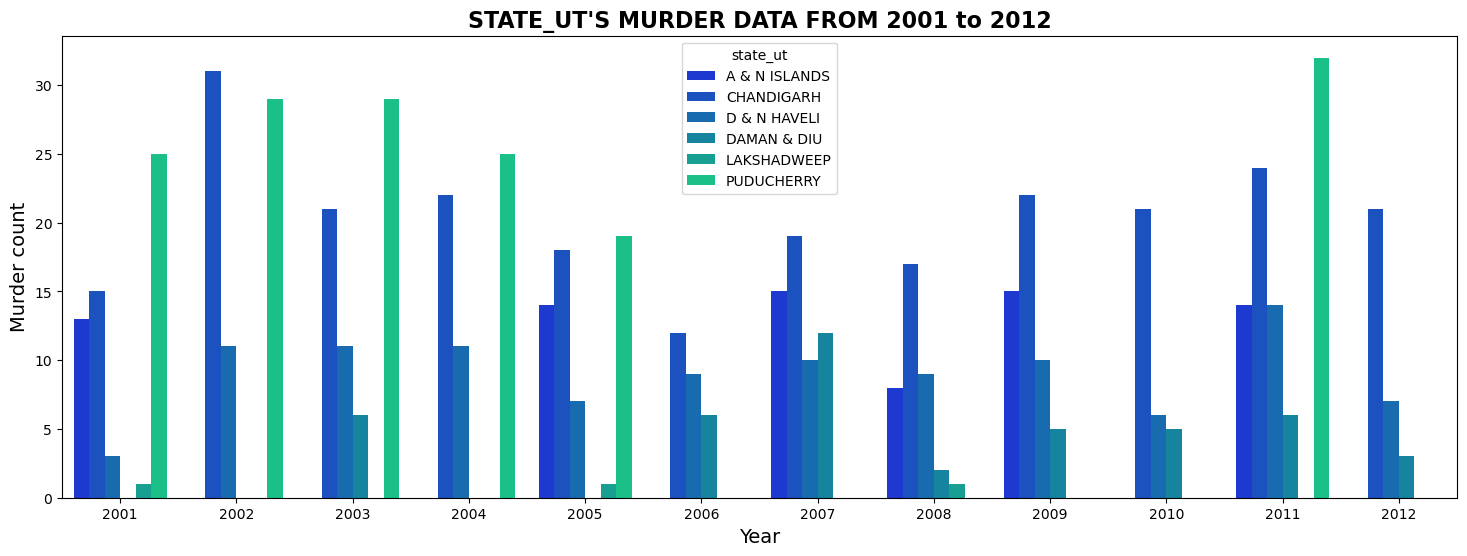

In [298]:
# plotting the graph
plt.figure(figsize = (18, 6))
sns.barplot(x ='year' ,y = "murder",data = df2, palette = 'winter',hue ='state_ut')
plt.title("STATE_UT'S MURDER DATA FROM 2001 to 2012",fontsize = 16,fontweight = 'bold')

plt.xlabel("Year", fontsize = 14)
plt.ylabel('Murder count',fontsize = 14)
plt.show()